# Data Exploration

We are using the Sign Language MNIST datasets from Kaggle.

But first, we are importing all the libraries needed.

In [8]:
import numpy as np 
import pandas as pd 
        
import matplotlib.pyplot as plt 
import seaborn as sns 


The datasets that we found from kaggle were separated into training and testing csv files. We've uploaded those zip files to the Gihub repo. Here we are unzipping those files.

In [2]:
# getting the train and test data sets from github repo
url_train = "https://github.com/hirenpateldotdev/ecs171_final_project/raw/main/sign_mnist_train.csv.zip"
!wget -O data_train.zip "$url_train"
!unzip data_train.zip

url_test = "https://github.com/hirenpateldotdev/ecs171_final_project/raw/main/sign_mnist_test.csv.zip"
!wget -O data_test.zip "$url_test"
!unzip data_test.zip



zsh:1: command not found: wget
unzip:  cannot find or open data_train.zip, data_train.zip.zip or data_train.zip.ZIP.
zsh:1: command not found: wget
unzip:  cannot find or open data_test.zip, data_test.zip.zip or data_test.zip.ZIP.


Next we read the files. The size of the training and testing data are 27455 and 7172 respectively, each with one column named "label" indicating the alphabet the row referes to and 784 pixels, for an image of 28 X 28 pixels.

We want to merge the training and testing data into one file so in later steps we can apply cross validation to ensure the model is learning and predicting values as best as possible.

In [9]:
df_train = pd.read_csv("./sign_mnist_train.csv")
df_test = pd.read_csv("./sign_mnist_test.csv")
display(df_train.shape, df_train.head())
display(df_test.shape, df_test.head())



(27455, 785)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


(7172, 785)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


Here we combine both the files into one and plot a histogram showing that the dataset has equal number of training values for each of the 24 letters. As a reminder, 2 of the 26 alphabets in the Sign Language MNIST require movement of the hand, so we are classifying the rest of the 24 alphabets. (The two alphabets are label 9 = J and label 25 = Z, which you dont see the histogram plot below.)

The total number of images are 34627, the summation of the number of training and testing datasets.


(34627, 785)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,34627.000000,34627.000000,34627.000000,34627.000000,34627.000000,34627.000000,34627.000000,34627.000000,34627.000000,34627.000000,...,34627.000000,34627.000000,34627.000000,34627.000000,34627.000000,34627.000000,34627.000000,34627.000000,34627.000000,34627.00000
mean,12.096890,145.857077,148.903226,151.677824,153.984983,156.616600,158.904121,160.847171,162.610911,164.293384,...,140.574985,147.090479,152.791261,158.403211,161.332140,162.097063,161.923528,161.077136,160.211309,158.77919
std,7.333559,41.839313,40.355637,39.355866,38.762706,37.252215,36.130753,35.274594,34.137995,32.882325,...,63.914830,65.438124,64.713282,64.112086,64.055046,63.886450,64.166570,63.892399,64.395504,65.25230
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,5.000000,122.000000,126.000000,130.000000,133.000000,137.000000,140.000000,143.000000,145.000000,146.000000,...,91.500000,96.000000,102.000000,110.000000,118.000000,122.000000,124.000000,124.000000,124.000000,121.00000
50%,12.000000,151.000000,154.000000,156.000000,158.000000,160.000000,163.000000,164.000000,166.000000,167.000000,...,142.000000,161.000000,172.000000,179.000000,183.000000,183.000000,183.000000,182.000000,182.000000,181.00000
75%,18.000000,175.000000,177.000000,179.000000,180.000000,181.000000,182.000000,184.000000,185.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,205.000000,204.00000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000


<AxesSubplot: xlabel='label', ylabel='count'>

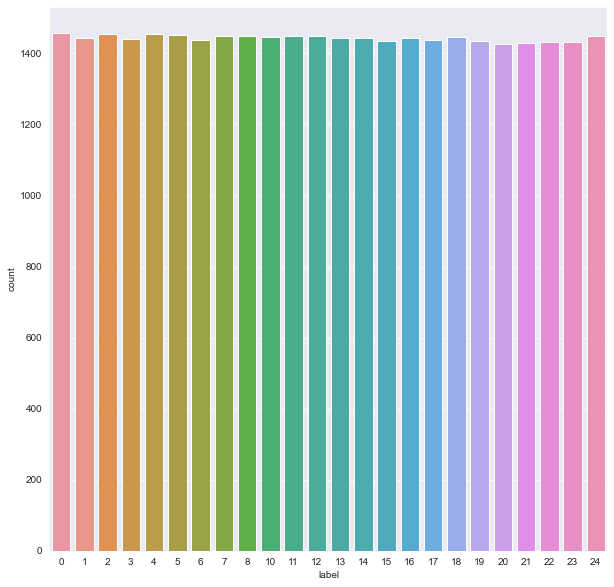

In [11]:
df = pd.concat([df_train,df_test])
display(df.shape)
display(df.describe())


plt.figure(figsize = (10,10)) # Label Count
sns.set_style("darkgrid")
sns.countplot(x=df["label"])

# Data Description

The number of classes = 24, ie the label (alphabet) values.

In [12]:
labels = df.label.unique()
labels



array([ 3,  6,  2, 13, 16,  8, 22, 18, 10, 20, 17, 19, 21, 23, 24,  1, 12,
       11, 15,  4,  0,  5,  7, 14])

In [13]:
#getting all the letters
letter = df.drop_duplicates(subset = ["label"])

letter = letter.drop(columns = ["label"])
print(letter.shape)



(24, 784)


The dataset has already been cropped, grayscale and normalized.
We have 24 classes for the 24 alphabets, each image is 28x28, a total of 784 pixels.

Here we are displaying our example classes before preprocessing. 


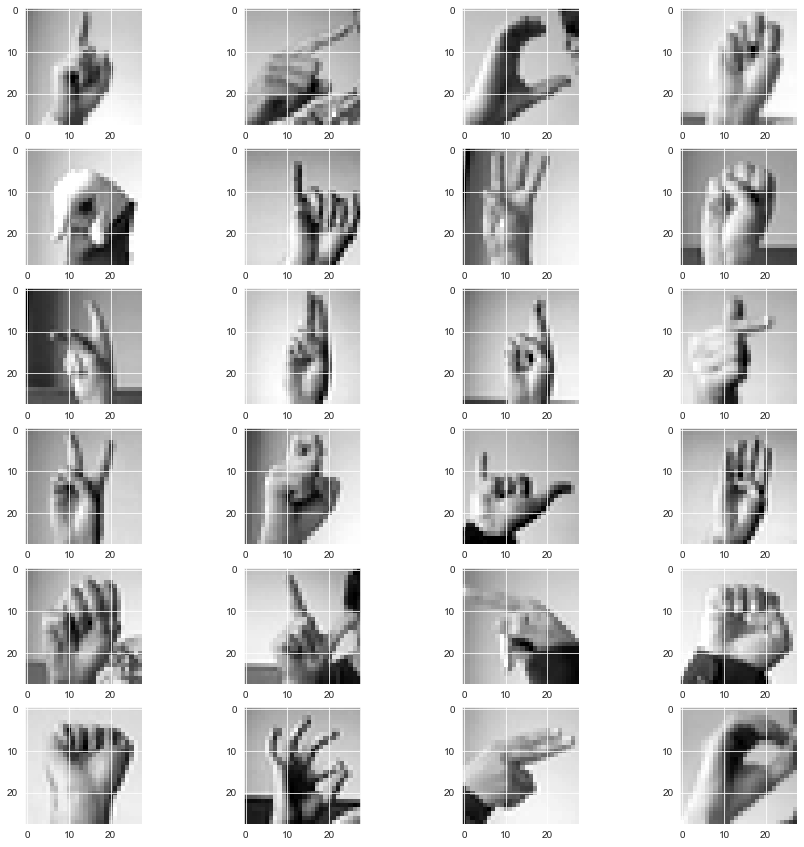

In [14]:
k = 0
figure, axis = plt.subplots(nrows=6, ncols=4, figsize=(15,15),)
for rows in range(6):
  for columns in range(4):
    img = letter.iloc[k].values.reshape(28,28)
    axis[rows][columns].imshow(img,cmap = "gray")
    k +=1

Here we standardize our data using preprocessing from sklearn.

(24, 784)
(24, 784)


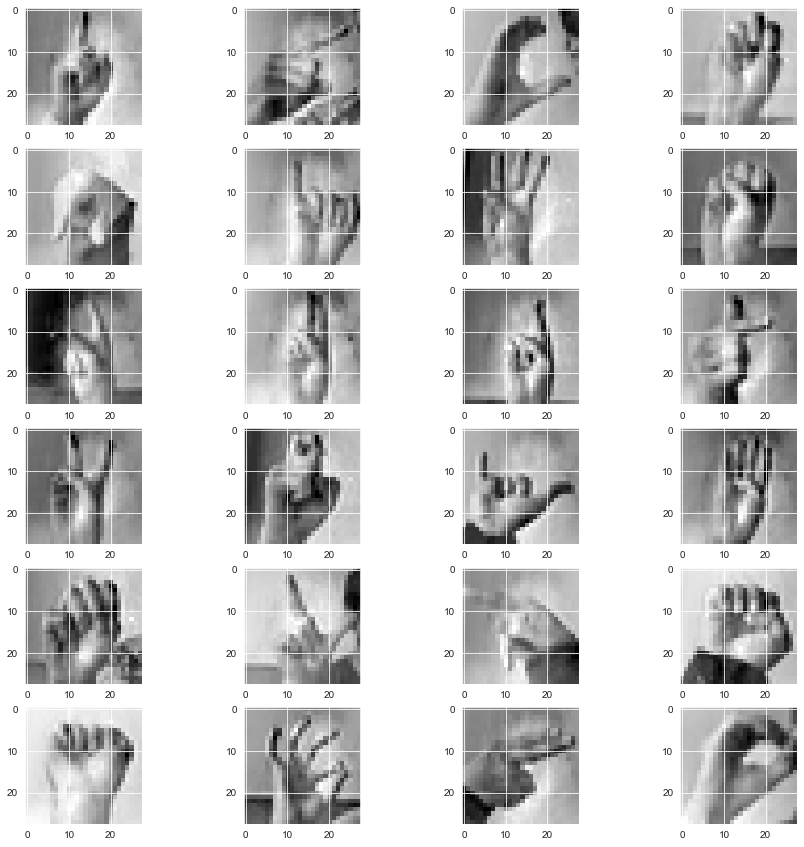

In [15]:
from sklearn import preprocessing


print(letter.shape)
letter = preprocessing.scale(letter)
print(letter.shape)
k = 0
figure, axis = plt.subplots(nrows=6, ncols=4, figsize=(15,15),)
for rows in range(6):
  for columns in range(4):
    img = letter[k].reshape(28,28)
    axis[rows][columns].imshow(img,cmap = "gray")
    k +=1




# Heat Map

Additionally, we wanted to see if we can use a heatmap on these handsigns to compare darker and lighter spots in the image and if it is possible to identify the handsigns from it.

We make a heatmap where we overlap all of the images of a particular label on each other and corelate each of the pixels to show the darker and lighter values in each hand sign.

In [16]:
print(len(df))

34627


0  =  34  images
1  =  50  images
2  =  41  images
3  =  37  images
4  =  36  images
5  =  50  images
6  =  27  images
7  =  34  images
8  =  0  images
9  =  43  images
10  =  57  images
11  =  34  images
12  =  35  images
13  =  46  images
14  =  46  images
15  =  50  images
16  =  39  images
17  =  46  images
18  =  58  images
19  =  41  images
20  =  43  images
21  =  31  images
22  =  43  images
23  =  79  images


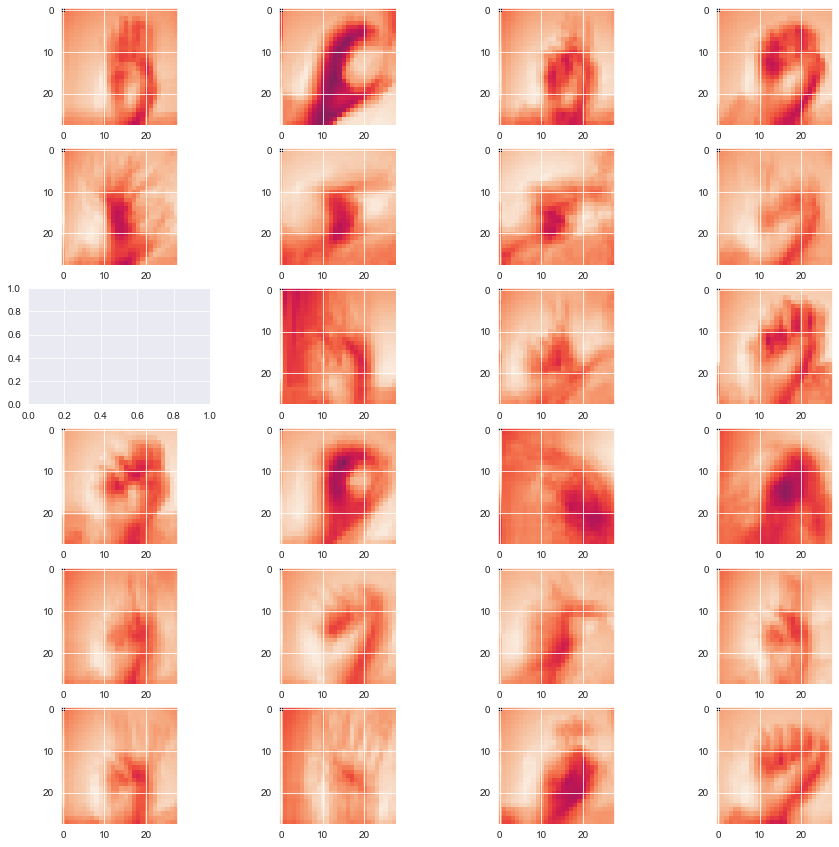

In [17]:

y = df['label']
x = df.values

sizeOfImg = 784
totalLetters = 24
heatmaps = [[0 for pixel in range(sizeOfImg)] for letter in range(totalLetters)]

lableCount = [0]* totalLetters


for k in range(1000):
    row = (df.loc[[k]].values.flatten().tolist())
    label = row[0] - 1
    lableCount[label] += 1
    for i in range(1,sizeOfImg):  
        heatmaps[label][i] = heatmaps[label][i] + row[i]

for k in range(len(lableCount)):
    print(k, " = " ,lableCount[k], " images")
    if (lableCount[k] != 0):
        label = k
        for i in range(sizeOfImg):
            heatmaps[k][i] = heatmaps[k][i] / lableCount[label]

figureHM, axisHM = plt.subplots(nrows=6, ncols=4, figsize=(15,15),)

import cv2

k = 0
for rowsHM in range(6):
    for columnsHM in range(4):
        if (lableCount[k] != 0):
            imgHM = np.reshape(heatmaps[k], (28,28))
            axisHM[rowsHM][columnsHM].imshow(imgHM)
        k+=1



# Preprocessing

We first used a label binarizer. The label column was replaced (which had values between 1 and 24) with a column for each letter which is a 1 if that entry is the letter that the column represents else 0.


In [18]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
label_binarizer = LabelBinarizer()

labels = df.label
images = df.iloc[: , 1:]

labels = label_binarizer.fit_transform(labels)


df.shape

(34627, 785)

In [19]:
labels.shape
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [20]:
images.shape
images

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,135,119,108,102,105,99,61,103,121,133,...,108,112,116,114,118,180,184,176,167,163
7168,157,159,161,164,166,166,171,174,175,176,...,213,213,213,214,213,211,210,210,209,208
7169,190,191,190,191,190,190,192,192,191,192,...,216,215,213,214,214,213,210,211,209,208
7170,201,205,208,209,214,216,218,223,226,229,...,112,169,255,255,237,113,91,67,70,63


In [21]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.20, random_state=7)


In [22]:
X_train.shape

(27701, 784)

We first scale our pixel values by dividing each value by 255. ( Pixel values range from 0-255).

In [23]:
#scale
X_train = X_train / 225
X_test = X_test / 225
print(X_train)

         pixel1    pixel2    pixel3    pixel4    pixel5    pixel6    pixel7  \
8127   0.431111  0.457778  0.471111  0.484444  0.506667  0.515556  0.533333   
24182  0.688889  0.702222  0.715556  0.728889  0.746667  0.755556  0.768889   
5757   0.466667  0.506667  0.591111  0.657778  0.688889  0.720000  0.742222   
22057  0.702222  0.702222  0.711111  0.728889  0.733333  0.737778  0.733333   
24978  0.617778  0.635556  0.648889  0.657778  0.671111  0.675556  0.680000   
...         ...       ...       ...       ...       ...       ...       ...   
2583   0.648889  0.657778  0.662222  0.680000  0.684444  0.693333  0.697778   
6685   0.791111  0.800000  0.800000  0.800000  0.800000  0.804444  0.804444   
13927  0.680000  0.680000  0.680000  0.680000  0.684444  0.684444  0.684444   
919    0.817778  0.831111  0.835556  0.840000  0.844444  0.844444  0.848889   
10742  0.284444  0.288889  0.297778  0.302222  0.306667  0.355556  0.413333   

         pixel8    pixel9   pixel10  ...  pixel775 

In [24]:
y_train.shape


(27701, 24)

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization

train_batch_size = 100
classes = 24
train_epochs = 10

2022-12-04 15:26:56.762982: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


We trained our first model with 1 hidden layer. The layer sizes were 100(input), 50(hidden), and 25(output).
The activation functions used was the linear for the hidden layer and relu for the input and output.
We trained for 10 epochs.


In [26]:

model = Sequential()

model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='linear'))
model.add(Dense(25, activation='relu'))

model.add(Dense(classes, activation = 'softmax'))

2022-12-04 15:27:17.057409: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
#TODO compile model
# model.compile()
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['accuracy'])


In [28]:
result_1 = model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs = train_epochs, batch_size = train_batch_size )


Epoch 1/10
278/278 [==============================] - 2s 3ms/step - loss: 0.2246 - accuracy: 0.1100 - val_loss: 0.2392 - val_accuracy: 0.0414
Epoch 2/10
278/278 [==============================] - 1s 3ms/step - loss: 0.1417 - accuracy: 0.2896 - val_loss: 0.1866 - val_accuracy: 0.1243
Epoch 3/10
278/278 [==============================] - 1s 2ms/step - loss: 0.1190 - accuracy: 0.4048 - val_loss: 0.1428 - val_accuracy: 0.2915
Epoch 4/10
278/278 [==============================] - 1s 2ms/step - loss: 0.1030 - accuracy: 0.4944 - val_loss: 0.2520 - val_accuracy: 0.1730
Epoch 5/10
278/278 [==============================] - 1s 2ms/step - loss: 0.0907 - accuracy: 0.5569 - val_loss: 0.1436 - val_accuracy: 0.3309
Epoch 6/10
278/278 [==============================] - 1s 2ms/step - loss: 0.0808 - accuracy: 0.6104 - val_loss: 0.1088 - val_accuracy: 0.5043
Epoch 7/10
278/278 [==============================] - 1s 2ms/step - loss: 0.0734 - accuracy: 0.6513 - val_loss: 0.1273 - val_accuracy: 0.4552
Epoch 

### Evaluating our Model

We use model.predict to create y_pred_test using X_test.

In [29]:
y_pred_train = model.predict(X_train.astype(float))

# make matrix into binary values based on if >= 0.5
for r in range(len(y_pred_train)):
  for c in range(len(y_pred_train[0])):
    elem = y_pred_train[r][c]
    if elem >= 0.5:
      y_pred_train[r][c] = 1
    else:
      y_pred_train[r][c] = 0

y_pred_train

866/866 [==============================] - 1s 996us/step


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [30]:
y_pred_test = model.predict(X_test.astype(float))

# make matrix into binary values based on if >= 0.5
for r in range(len(y_pred_test)):
  for c in range(len(y_pred_test[0])):
    elem = y_pred_test[r][c]
    if elem >= 0.5:
      y_pred_test[r][c] = 1
    else:
      y_pred_test[r][c] = 0
      
y_pred_test

217/217 [==============================] - 0s 1ms/step


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

We evaluate our model next using classification report.

In [31]:
# classification report
from sklearn.metrics import classification_report 
print("TRAINING:\n",classification_report(y_train, y_pred_train))
print("TESTING:\n", classification_report(y_test, y_pred_test))

TRAINING:
               precision    recall  f1-score   support

           0       0.95      0.73      0.82      1174
           1       1.00      0.63      0.78      1145
           2       0.86      0.99      0.92      1130
           3       1.00      0.21      0.34      1172
           4       0.73      0.74      0.73      1187
           5       0.33      0.92      0.49      1163
           6       0.78      0.89      0.83      1157
           7       0.96      0.52      0.67      1173
           8       0.65      0.29      0.40      1148
           9       0.98      0.18      0.31      1164
          10       0.73      0.85      0.79      1165
          11       0.68      0.28      0.39      1177
          12       0.83      0.22      0.35      1109
          13       0.87      0.65      0.74      1152
          14       0.95      0.89      0.92      1143
          15       0.99      0.84      0.91      1167
          16       0.00      0.00      0.00      1129
          17    

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

### Plotting Graph for accuracy and loss visualization



We plot a graph for accuracy and loss visualization using matplotlib.
As we see in the graph, we see an underfitting. Our model performs well on the training set but not on the test set.

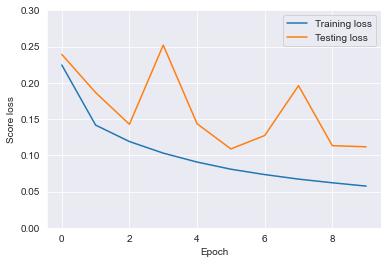

In [32]:
import matplotlib.pyplot as plt

plt.plot(result_1.history['loss'], label='Training loss')
plt.plot(result_1.history['val_loss'], label='Testing loss')
plt.xlabel('Epoch')
plt.ylabel('Score loss')
plt.ylim([0, 0.3])
plt.legend()
plt.show()


217/217 - 0s - loss: 0.1118 - accuracy: 0.5377 - 205ms/epoch - 946us/step


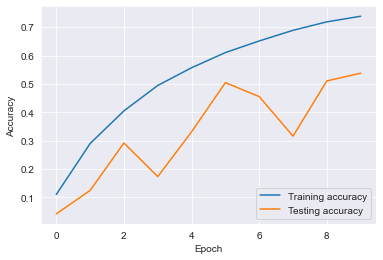

In [33]:
plt.plot(result_1.history['accuracy'], label='Training accuracy')
plt.plot(result_1.history['val_accuracy'], label = 'Testing accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

We seek to improve our model. Our next approach might be a NN with more convolutional layers. The cause for an underfitting maybe that the model is too simple.

## Model 2

In [37]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

In [50]:

model2 = Sequential()


model2.add(Conv2D(64, kernel_size=(3,3), activation='relu' , input_shape=(28,28,1)))
model2.add(MaxPool2D(pool_size= (2,2)))

model2.add(Conv2D(36, kernel_size=(3,3), activation='relu' ))


model2.add(Flatten())
model2.add(Dense(100, activation='relu'))
model2.add(Dense(50, activation='linear'))
model2.add(Dense(25, activation='relu'))

model2.add(Dense(classes, activation = 'softmax'))

model2.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy',metrics=['accuracy'])
result_2 = model2.fit(X_train, y_train, validation_data= (X_test, y_test), epochs = train_epochs, batch_size = train_batch_size )


Epoch 1/10
278/278 [==============================] - 17s 58ms/step - loss: 0.1525 - accuracy: 0.3121 - val_loss: 0.1289 - val_accuracy: 0.4433
Epoch 2/10
278/278 [==============================] - 17s 60ms/step - loss: 0.0543 - accuracy: 0.7947 - val_loss: 0.0739 - val_accuracy: 0.7056
Epoch 3/10
278/278 [==============================] - 17s 60ms/step - loss: 0.0198 - accuracy: 0.9455 - val_loss: 0.0212 - val_accuracy: 0.9565
Epoch 4/10
278/278 [==============================] - 16s 58ms/step - loss: 0.0064 - accuracy: 0.9900 - val_loss: 0.0039 - val_accuracy: 0.9949
Epoch 5/10
278/278 [==============================] - 17s 62ms/step - loss: 0.0037 - accuracy: 0.9935 - val_loss: 0.0011 - val_accuracy: 0.9997
Epoch 6/10
278/278 [==============================] - 17s 61ms/step - loss: 0.0022 - accuracy: 0.9966 - val_loss: 0.0018 - val_accuracy: 0.9996
Epoch 7/10
278/278 [==============================] - 16s 58ms/step - loss: 0.0015 - accuracy: 0.9978 - val_loss: 1.1676e-04 - val_accur

In [51]:
y_pred_test = model2.predict(X_test.astype(float))

# make matrix into binary values based on if >= 0.5
for r in range(len(y_pred_test)):
  for c in range(len(y_pred_test[0])):
    elem = y_pred_test[r][c]
    if elem >= 0.5:
      y_pred_test[r][c] = 1
    else:
      y_pred_test[r][c] = 0
      
y_pred_test

217/217 [==============================] - 1s 4ms/step


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [52]:
# classification report
from sklearn.metrics import classification_report 
print("TRAINING:\n",classification_report(y_train, y_pred_train))

TRAINING:
               precision    recall  f1-score   support

           0       0.95      0.73      0.82      1174
           1       1.00      0.63      0.78      1145
           2       0.86      0.99      0.92      1130
           3       1.00      0.21      0.34      1172
           4       0.73      0.74      0.73      1187
           5       0.33      0.92      0.49      1163
           6       0.78      0.89      0.83      1157
           7       0.96      0.52      0.67      1173
           8       0.65      0.29      0.40      1148
           9       0.98      0.18      0.31      1164
          10       0.73      0.85      0.79      1165
          11       0.68      0.28      0.39      1177
          12       0.83      0.22      0.35      1109
          13       0.87      0.65      0.74      1152
          14       0.95      0.89      0.92      1143
          15       0.99      0.84      0.91      1167
          16       0.00      0.00      0.00      1129
          17    

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
print("TESTING:\n", classification_report(y_test, y_pred_test))

TESTING:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       283
           1       1.00      1.00      1.00       297
           2       1.00      1.00      1.00       324
           3       1.00      1.00      1.00       269
           4       1.00      1.00      1.00       268
           5       1.00      1.00      1.00       288
           6       1.00      1.00      1.00       281
           7       1.00      1.00      1.00       276
           8       1.00      1.00      1.00       302
           9       1.00      1.00      1.00       281
          10       1.00      1.00      1.00       285
          11       1.00      1.00      1.00       272
          12       1.00      1.00      1.00       333
          13       1.00      1.00      1.00       290
          14       1.00      1.00      1.00       292
          15       1.00      1.00      1.00       276
          16       1.00      1.00      1.00       309
          17     

### Plotting Graph for accuracy and loss visualization

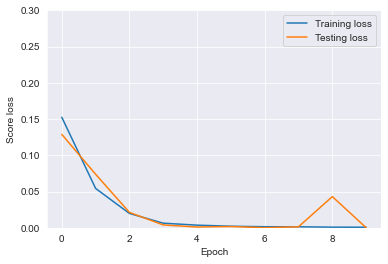

In [54]:
import matplotlib.pyplot as plt

plt.plot(result_2.history['loss'], label='Training loss')
plt.plot(result_2.history['val_loss'], label='Testing loss')
plt.xlabel('Epoch')
plt.ylabel('Score loss')
plt.ylim([0, 0.3])
plt.legend()
plt.show()


217/217 - 1s - loss: 1.2176e-04 - accuracy: 1.0000 - 920ms/epoch - 4ms/step


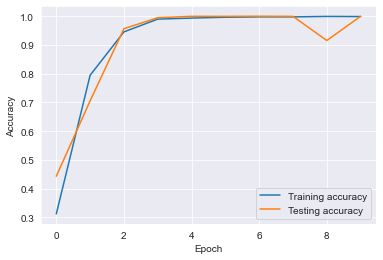

In [56]:

plt.plot(result_2.history['accuracy'], label='Training accuracy')
plt.plot(result_2.history['val_accuracy'], label = 'Testing accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model2.evaluate(X_test,  y_test, verbose=2)